In [1]:
import pyerrors as pe
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_test = {'a':[0,1,2,3,4,5],'b':[0,1,2,3,4,5]}
y_test = {'a':[pe.Obs([np.random.normal(i, i*1.5, 1000)],['ensemble1']) for i in range(1,7)],
          'b':[pe.Obs([np.random.normal(val, val*1.5, 1000)],['ensemble1']) for val in [1.0,2.5,4.0,5.5,7.0,8.5]]}
for key in y_test.keys():
    [item.gamma_method() for item in y_test[key]]

In [3]:
def func_a(a, x):
    return a[1] * x + a[0]

def func_b(a, x):
    return a[2] * x + a[0]

funcs_test = {"a": func_a,"b": func_b}

In [4]:
output_test = pe.fits.least_squares(x_test,y_test,funcs_test,method='migrad',expected_chisquare=True)

Fit with 3 parameters
Method: migrad
Optimization terminated successfully.
chisquare/d.o.f.: 1.1407448193242595
fit parameters [0.98418071 0.95797691 1.52431702]
chisquare/expected_chisquare: 1.1485431097238927


In [6]:
output_test.gamma_method()

In [7]:
print(output_test)

Goodness of fit:
χ²/d.o.f. = 1.140745
χ²/χ²exp  = 1.148543
p-value   = 0.3293
Fit parameters:
0	 0.984(33)
1	 0.958(32)
2	 1.524(42)



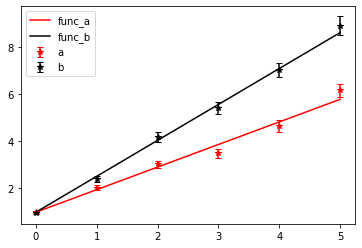

In [8]:
colour= {'a':'red','b':'black'}
plt.figure()
for key in funcs_test.keys():
    plt.errorbar(x_test[key],[o.value for o in y_test[key]],ls='none',marker='*',color=colour[key],yerr=[o.dvalue for o in y_test[key]],capsize=3,label=key)
    plt.plot([x_val for x_val in x_test[key]],[funcs_test[key](output_test.fit_parameters,x_val) for x_val in x_test[key]],color=colour[key],label='func_'+key)
plt.legend()
plt.show()

In [9]:
x_const = {'c':list(np.arange(0,10)),'d':list(np.arange(10,20))}
y_const = {'c':[pe.Obs([np.random.normal(1, val, 1000)],['ensemble1']) 
               for val in [0.25,0.3,0.01,0.2,0.5,1.3,0.26,0.4,0.1,1.0]],
          'd':[pe.Obs([np.random.normal(1, val, 1000)],['ensemble1'])
               for val in [0.5,1.12,0.26,0.25,0.3,0.01,0.2,1.0,0.38,0.1]]}
for key in y_const.keys():
    [item.gamma_method() for item in y_const[key]]

In [10]:
def func_const(a, x):
    return a[0]

funcs_const = {"c": func_const,"d": func_const}

In [11]:
output_const = pe.combined_fits.combined_fit(x_const,y_const,funcs_const,method='migrad')

Fit with 1 parameter
Method: migrad
Optimization terminated successfully.
chisquare/d.o.f.: 0.7268201670950173
fit parameters [0.99968989]


In [12]:
output_const.chisquare

13.80958317480533

In [13]:
output_const.gamma_method()

In [14]:
output_const

        chisquare: 13.80958317480533
 chisquare_by_dof: 0.7268201670950173
              dof: 19
     fit_function: {'c': <function func_const at 0x7f3742783378>, 'd': <function func_const at 0x7f3742783378>}
   fit_parameters: [Obs[0.99969(22)]]
       iterations: 15
          message: 'Optimization terminated successfully.'
           method: 'migrad'
          p_value: 0.7946762502119166

In [15]:
y_const_ls = []
for key in y_const:
    for item in y_const[key]:
        y_const_ls.append(item)

In [16]:
print(y_const_ls)

[Obs[0.9905(78)], Obs[1.0090(96)], Obs[0.99960(32)], Obs[1.0032(62)], Obs[1.018(18)], Obs[0.988(49)], Obs[1.0084(83)], Obs[1.000(13)], Obs[0.9960(32)], Obs[1.009(34)], Obs[0.990(16)], Obs[0.970(35)], Obs[0.9865(91)], Obs[0.9981(80)], Obs[1.0065(97)], Obs[0.99983(31)], Obs[0.9985(61)], Obs[1.040(32)], Obs[1.011(12)], Obs[0.9966(31)]]


In [17]:
output_const2 = pe.fits.least_squares(list(np.arange(0,20)),y_const_ls, func_const)

Fit with 1 parameter
Method: Levenberg-Marquardt
`ftol` termination condition is satisfied.
chisquare/d.o.f.: 0.7268201670947627


In [18]:
output_const2.gamma_method()

In [19]:
output_const2

        chisquare: 13.809583174800492
 chisquare_by_dof: 0.7268201670947627
              dof: 19
     fit_function: <function func_const at 0x7f3742783378>
   fit_parameters: [Obs[0.99969(22)]]
       iterations: 7
          message: '`ftol` termination condition is satisfied.'
           method: 'Levenberg-Marquardt'
          p_value: 0.7946762502121925

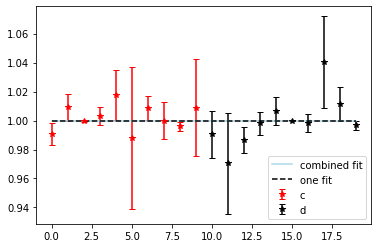

In [20]:
colour= {'c':'red','d':'black'}
plt.figure()
for key in funcs_const.keys():
    plt.errorbar(x_const[key],[o.value for o in y_const[key]],ls='none',marker='*',
                 color=colour[key],yerr=[o.dvalue for o in y_const[key]],capsize=3,label=key)
plt.plot(np.arange(0,20),[func_const(output_const.fit_parameters,x_val) for x_val in list(np.arange(0,20))],
         label='combined fit',color ='lightblue')
plt.plot(np.arange(0,20),[func_const(output_const2.fit_parameters,x_val) for x_val in list(np.arange(0,20))],
         label='one fit',color='black',ls='--')
plt.legend()
plt.show()

In [21]:
def func_const_wrong():
    a=x

In [22]:
funcs_const_wrong = {"c": 4,"d": func_const_wrong}

In [23]:
output_const2_wrong = pe.combined_fits.combined_fit(x_const,y_const,funcs_const_wrong,method='migrad')

TypeError: func (key=c) is not a function.

In [24]:
x_const_wrong = {'c':list(np.arange(0,11)),'d':list(np.arange(10,20))}

In [25]:
pe.combined_fits.combined_fit(x_const_wrong,y_const,funcs_const,method='migrad')

Exception: x and y input (key=c) do not have the same length